In [1]:
# import necessary libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# parameters
std  = 2
sampsize = 41
xBars = np.linspace(-2,2,41)

# initialize results vector
powers = np.zeros(len(xBars))

# run the experiment
for i,xm in enumerate(xBars):
  powers[i] = smp.TTestPower().power(effect_size=xm/std, nobs=sampsize, alpha=.05)


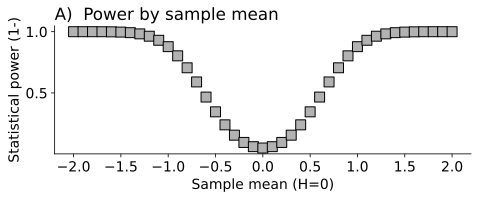

In [4]:
# plot
plt.figure(figsize=(7,3))
plt.plot(xBars,powers,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.xlabel(r'Sample mean (H=0)')
plt.ylabel(r'Statistical power (1-)')
plt.title(r'A)  Power by sample mean')

# display the figure
plt.tight_layout()
plt.show()
     

In [5]:
# parameters
xBar = .5
sampleSizes = np.arange(10,251,step=10)

# initialize results vector
powers = np.zeros(len(sampleSizes))

# the experiment
for i,ss in enumerate(sampleSizes):
  powers[i] = smp.TTestPower().power(effect_size=xBar/std, nobs=ss, alpha=.05)


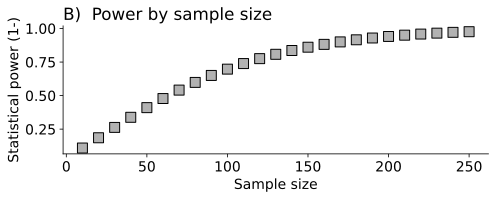

In [6]:
# plot
plt.figure(figsize=(7,3))
plt.plot(sampleSizes,powers,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.xlabel('Sample size')
plt.ylabel(r'Statistical power (1-)')
plt.title(r'B)  Power by sample size')

# display the figure
plt.tight_layout()
plt.show()

In [7]:
# parameters
xBars = np.linspace(-2,2,41)
sampleSizes = np.arange(10,251,step=10)

# initialize the results matrix
powers = np.zeros((len(xBars),len(sampleSizes)))


# run the experiment (manipulate mean and N independently)
for xi,xm in enumerate(xBars):
  for si,ss in enumerate(sampleSizes):
    powers[xi,si] = smp.TTestPower().power(effect_size=xm/std, nobs=ss, alpha=.05)


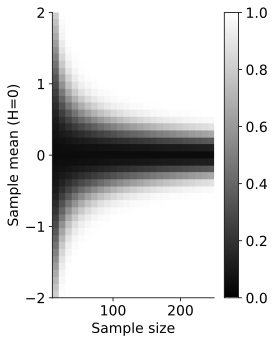

In [8]:
# plot
plt.figure(figsize=(4,5))
plt.imshow(powers,origin='lower',extent=[sampleSizes[0],sampleSizes[-1],xBars[0],xBars[-1]],
           aspect='auto',cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.xlabel('Sample size')
plt.ylabel(r'Sample mean (H=0)')
plt.yticks(range(-2,3))

# display the figure
plt.tight_layout()
plt.show()

# Exe 2

In [9]:
# parameters
xBars = np.linspace(-2,2,42)
power = np.linspace(.5,.95,27)

# initialize the results matrix
sampleSizes = np.zeros((len(xBars),len(power)))

In [10]:
# run the experiment (manipulate mean and N independently)
for xi,xm in enumerate(xBars):
  for pi,pwr in enumerate(power):
    sampleSizes[xi,pi] = smp.TTestPower().solve_power(effect_size=xm/std, alpha=.05, power=pwr)

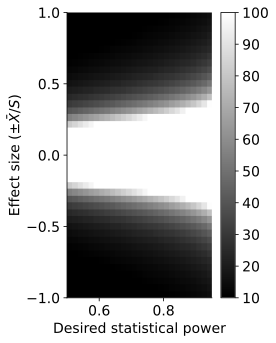

In [11]:
# plot
plt.figure(figsize=(4,5))
plt.imshow(sampleSizes,origin='lower',extent=[power[0],power[-1],xBars[0]/std,xBars[-1]/std],
           aspect='auto',cmap='gray',vmin=10,vmax=100)
plt.colorbar()
plt.xlabel('Desired statistical power')
plt.ylabel(r'Effect size ($\pm\bar{X}/S$)')
plt.yticks(np.arange(-1,1.1,.5))

# display the figure
plt.tight_layout()
plt.show()

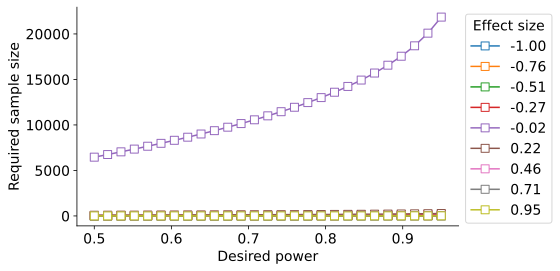

In [12]:
plt.figure(figsize=(8,4))

rows2plot = slice(0,len(xBars),5)

# plot
plt.plot(power,sampleSizes[rows2plot,:].T,'s-',markerfacecolor='w',markersize=8)
plt.legend([f'{v/std:.2f}' for v in xBars[rows2plot]],bbox_to_anchor=(1,1),title='Effect size')
plt.xlabel('Desired power')
plt.ylabel('Required sample size')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [13]:
# parameters
std  = 2
sampsize = 42
xBars = np.linspace(-2,2,41)


In [14]:
# initialize results vector
powers = np.zeros((len(xBars),3))

In [15]:
# run the experiment!
for i,xm in enumerate(xBars):
  powers[i,0] = smp.TTestPower().power(effect_size=xm/std, nobs=sampsize, alpha=.001)
  powers[i,1] = smp.TTestPower().power(effect_size=xm/std, nobs=sampsize, alpha=.01)
  powers[i,2] = smp.TTestPower().power(effect_size=xm/std, nobs=sampsize, alpha=.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


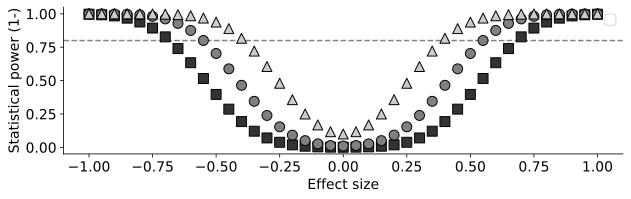

In [16]:
# plot
plt.figure(figsize=(9,3))
plt.plot(xBars/std,powers[:,0],'ks',markersize=10,markerfacecolor=(.2,.2,.2),label=r'')
plt.plot(xBars/std,powers[:,1],'ko',markersize=10,markerfacecolor=(.5,.5,.5),label=r'')
plt.plot(xBars/std,powers[:,2],'k^',markersize=10,markerfacecolor=(.8,.8,.8),label=r'')
plt.axhline(y=.8,linestyle='--',color='gray',zorder=-10,label=r'')
plt.xlabel(r'Effect size')
plt.ylabel(r'Statistical power (1-)')
plt.legend(bbox_to_anchor=(1,1))

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

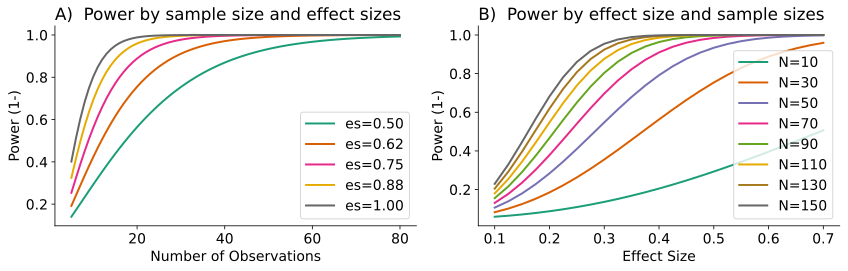

In [17]:
# plot
_,axs = plt.subplots(1,2,figsize=(12,4))

# call the power plot calculations
smp.TTestPower().plot_power(dep_var='nobs',nobs=np.arange(5,81),effect_size=np.linspace(.5,1,5),ax=axs[0])
smp.TTestPower().plot_power(dep_var='effect_size',nobs=np.arange(10,151,20),effect_size=np.linspace(.1,.7,25),ax=axs[1])

# some plot adjustments
axs[0].set_title(r'A)  Power by sample size and effect sizes')
axs[1].set_title(r'B)  Power by effect size and sample sizes')
axs[0].set_ylabel(r'Power (1-)')
axs[1].set_ylabel(r'Power (1-)')

# fix strange issue of sample sizes printing as 10.00
axs[1].legend([l[:-3] for l in axs[1].get_legend_handles_labels()[1]])

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [18]:
# simulation parameters
effectSize = .6  
n1 = 50          
ssRatio = 2      

# Compute power
power = smp.TTestIndPower().power(effect_size=effectSize, nobs1=n1, alpha=.05, ratio=ssRatio)
print(f'Total sample size is {n1}+{n1*ssRatio}={n1+n1*ssRatio}, power is {power:.2f}')

Total sample size is 50+100=150, power is 0.93
